<a href="https://colab.research.google.com/github/MayankJaideep/SkillCraft-task4-/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

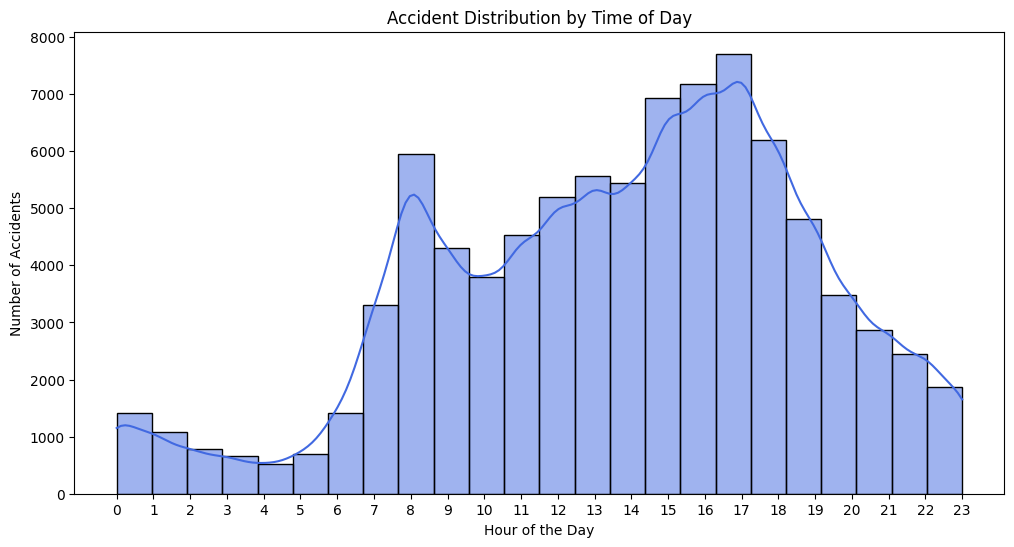

<Figure size 1400x600 with 0 Axes>

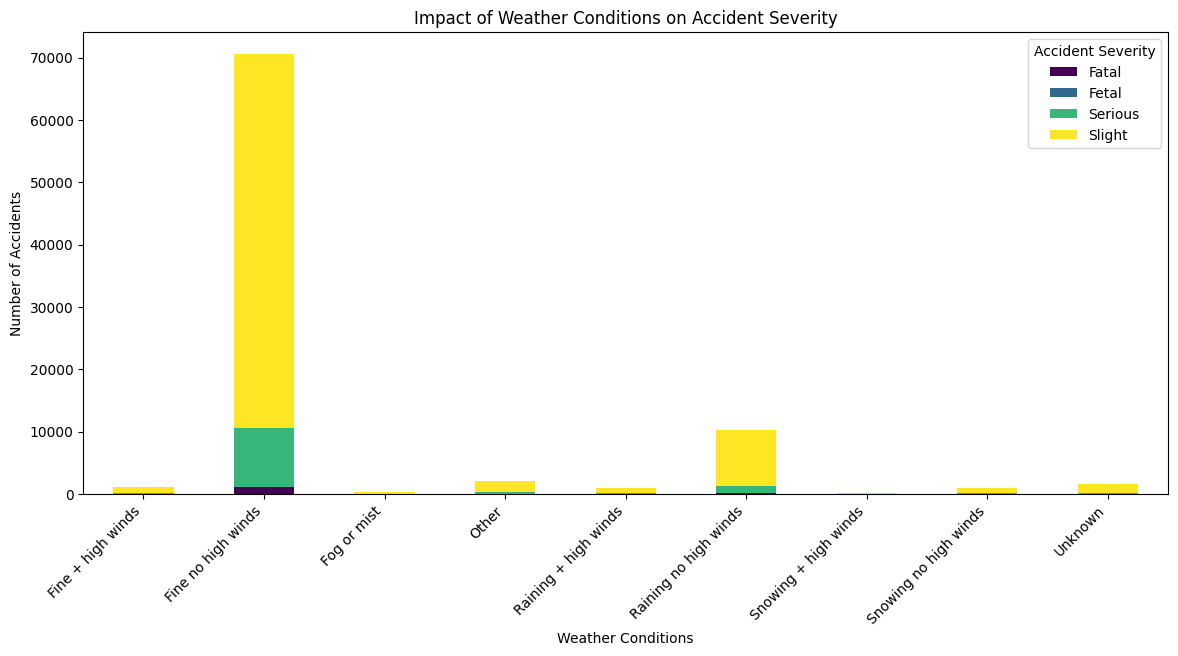

<Figure size 1200x600 with 0 Axes>

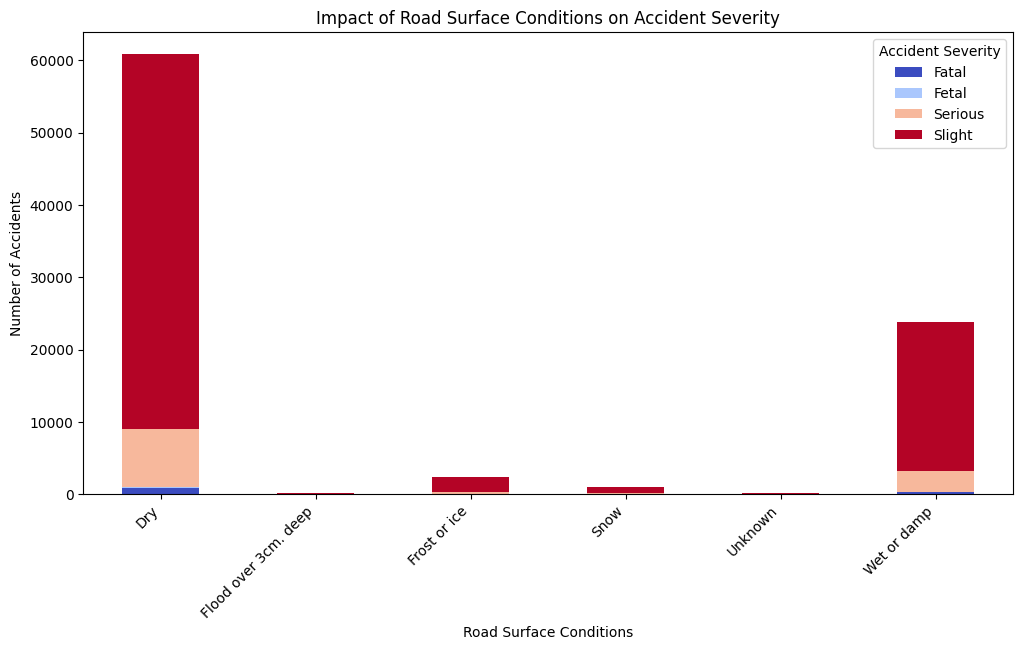

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = "Road Accident Data.csv"
df = pd.read_csv(file_path)

# Convert 'Accident Date' to datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

# Convert 'Time' to datetime format (extract only hour)
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['Weather_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Carriageway_Hazards']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Drop duplicates
df = df.drop_duplicates()

# Plot Accident Distribution by Time of Day
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'].dropna(), bins=24, kde=True, color='royalblue')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accident Distribution by Time of Day")
plt.xticks(range(0, 24))
plt.show()

# Impact of Weather Conditions on Accident Severity
weather_severity = df.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
plt.figure(figsize=(14, 6))
weather_severity.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,6))
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.title("Impact of Weather Conditions on Accident Severity")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Accident Severity")
plt.show()

# Impact of Road Surface Conditions on Accident Severity
road_surface_severity = df.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().unstack()
plt.figure(figsize=(12, 6))
road_surface_severity.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Accidents")
plt.title("Impact of Road Surface Conditions on Accident Severity")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Accident Severity")
plt.show()

# Create Accident Hotspot Heatmap
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=6)
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(m)
m.save("accident_hotspots.html")
